In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Create dataset for features of interest
cdf = df_fuel[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [18]:
corr = cdf.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1,0.93,0.82,0.87
CYLINDERS,0.93,1,0.78,0.85
FUELCONSUMPTION_COMB,0.82,0.78,1,0.89
CO2EMISSIONS,0.87,0.85,0.89,1


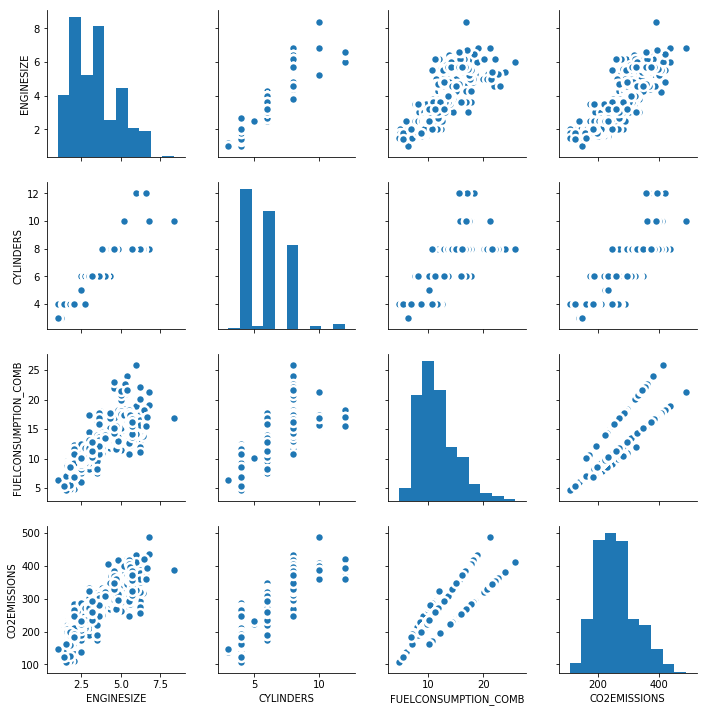

In [16]:
# Examine feature correlations
sns.pairplot(cdf, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

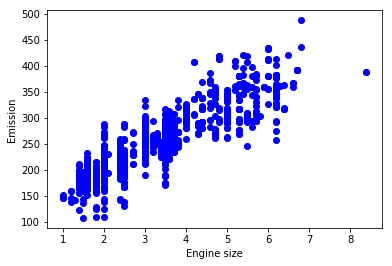

In [4]:
# See linear relationship between enginesize and co2emissions a little closer
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

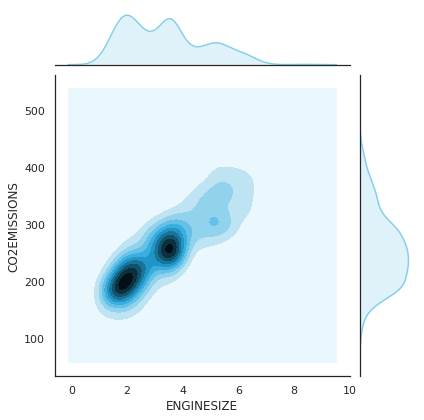

In [20]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_fuel["ENGINESIZE"], y=df_fuel["CO2EMISSIONS"], kind='kde', color="skyblue")

In [6]:
#Create train and test data
msk = np.random.rand(len(df_fuel)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Polynomial
Polynomial regression Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

𝑦= 𝑏 + 𝜃1𝑥 + 𝜃2𝑥2

Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1, 𝑥 , and 𝑥2 .

PloynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [8]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         51.64639318 -1.73026779]]
Intercept:  [106.41633846]


## 2nd degree polynomial 

Text(0, 0.5, 'Emission')

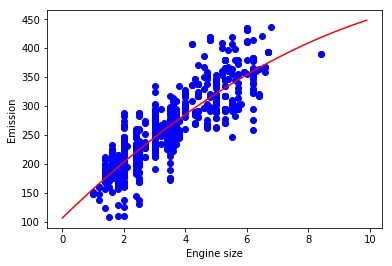

In [9]:
# 2 Degree Polynomial
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## 2nd degree polynomial evaluation 

In [10]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 25.01
Residual sum of squares (MSE): 986.21
R2-score: 0.69


## 3rd degree polynomial and evaluation 

Coefficients:  [[ 0.         31.87957992  3.67999066 -0.44542978]]
Intercept:  [127.53154046]
Mean absolute error: 24.90
Residual sum of squares (MSE): 980.79
R2-score: 0.69


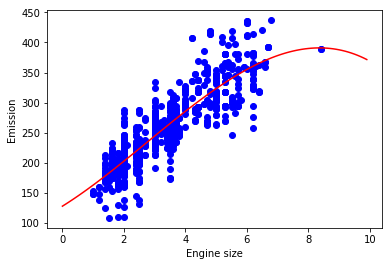

In [11]:
# Answer
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

In [24]:
# Show actual vs predicted values
for i in range(len(test_y3_)):
     print("Actual=%s, Predicted=%s" % (test_y[i], test_y3_[i]))

Actual=[196], Predicted=[202.44722469]
Actual=[136], Predicted=[182.12756381]
Actual=[212], Predicted=[219.08165717]
Actual=[359], Predicted=[352.23961349]
Actual=[338], Predicted=[312.41070344]
Actual=[214], Predicted=[202.44722469]
Actual=[230], Predicted=[202.44722469]
Actual=[214], Predicted=[202.44722469]
Actual=[235], Predicted=[202.44722469]
Actual=[224], Predicted=[244.26359204]
Actual=[258], Predicted=[244.26359204]
Actual=[242], Predicted=[202.44722469]
Actual=[239], Predicted=[202.44722469]
Actual=[354], Predicted=[330.1813126]
Actual=[409], Predicted=[330.1813126]
Actual=[306], Predicted=[293.33980964]
Actual=[285], Predicted=[244.26359204]
Actual=[281], Predicted=[285.42220462]
Actual=[209], Predicted=[202.44722469]
Actual=[380], Predicted=[355.07585064]
Actual=[380], Predicted=[355.07585064]
Actual=[209], Predicted=[202.44722469]
Actual=[237], Predicted=[244.26359204]
Actual=[209], Predicted=[202.44722469]
Actual=[232], Predicted=[244.26359204]
Actual=[292], Predicted=[30

In [25]:
# Add predictions to original dataframe
df_yhat = pd.DataFrame(test_y3_)
df_yhat.columns  = ['PREDICTION']
np.asanyarray(df_yhat[['PREDICTION']])

array([[202.44722469],
       [182.12756381],
       [219.08165717],
       [352.23961349],
       [312.41070344],
       [202.44722469],
       [202.44722469],
       [202.44722469],
       [202.44722469],
       [244.26359204],
       [244.26359204],
       [202.44722469],
       [202.44722469],
       [330.1813126 ],
       [330.1813126 ],
       [293.33980964],
       [244.26359204],
       [285.42220462],
       [202.44722469],
       [355.07585064],
       [355.07585064],
       [202.44722469],
       [244.26359204],
       [202.44722469],
       [244.26359204],
       [301.10282069],
       [355.07585064],
       [244.26359204],
       [269.2087352 ],
       [269.2087352 ],
       [202.44722469],
       [202.44722469],
       [269.2087352 ],
       [269.2087352 ],
       [244.26359204],
       [360.48538764],
       [360.48538764],
       [360.48538764],
       [269.2087352 ],
       [360.48538764],
       [360.48538764],
       [178.15347472],
       [269.2087352 ],
       [269

In [27]:
# Model Output
df_model_output = pd.merge(cdf,df_yhat,how = 'left',left_index = True, right_index = True)
df_model_output.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,PREDICTION
0,2.0,4,8.5,196,202.447225
1,2.4,4,9.6,221,182.127564
2,1.5,4,5.9,136,219.081657
3,3.5,6,11.1,255,352.239613
4,3.5,6,10.6,244,312.410703
